## Analysis for Internet Speed Measurements

In [1]:
#!/usr/bin/env python

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import seaborn as sns
import pandas as pd
import numpy as np

filename = "./data/measurements_210821.csv"

# read data
df = pd.read_csv(filename, index_col=0, parse_dates=True)
df["download"] = df["download [Mbit/s]"]
df["upload"] = df["upload [Mbit/s]"]
df["ping"] = df["ping [s]"]


df

,download [Mbit/s],upload [Mbit/s],ping [s],server_name,server_country,server_id,notes,download,upload,ping
timestamp,,,,,,,,,,
2021-03-02 00:54:24,933.04,901.84,2.797,Zürich,Switzerland,6251.0,NaN,933.04,901.84,2.797
2021-03-02 01:04:30,929.64,881.56,2.348,Zürich,Switzerland,6251.0,NaN,929.64,881.56,2.348
2021-03-02 01:14:36,932.44,908.30,3.751,Zürich,Switzerland,6251.0,NaN,932.44,908.30,3.751
2021-03-02 01:24:43,928.10,900.21,4.258,Zürich,Switzerland,6251.0,NaN,928.10,900.21,4.258
2021-03-02 01:34:49,934.85,902.40,3.064,Zürich,Switzerland,6251.0,NaN,934.85,902.40,3.064
...,...,...,...,...,...,...,...,...,...,...
2021-06-28 19:42:36,NaN,NaN,NaN,NaN,NaN,NaN,<urlopen error [Errno -3] Temporary failure in...,NaN,NaN,NaN
2021-06-30 10:48:54,NaN,NaN,NaN,NaN,NaN,NaN,<urlopen error [Errno 104] Connection reset by...,NaN,NaN,NaN
2021-07-05 02:07:00,NaN,NaN,NaN,NaN,NaN,NaN,<urlopen error [Errno -3] Temporary failure in...,NaN,NaN,NaN


In [14]:
df.tail(50)

,download [Mbit/s],upload [Mbit/s],ping [s],server_name,server_country,server_id,notes,download,upload,ping
timestamp,,,,,,,,,,
2021-04-07 15:11:27,924.22,848.80,3.760,Zürich,Switzerland,6251.0,NaN,924.22,848.80,3.760
2021-04-07 15:21:33,896.92,803.57,3.415,Zurich,Switzerland,12743.0,NaN,896.92,803.57,3.415
2021-04-07 15:31:39,929.14,882.72,3.399,Zürich,Switzerland,6251.0,NaN,929.14,882.72,3.399
2021-04-07 15:41:46,932.24,903.84,4.357,Zürich,Switzerland,6251.0,NaN,932.24,903.84,4.357
2021-04-07 15:51:52,546.72,416.61,25.885,Wels,Austria,3840.0,NaN,546.72,416.61,25.885
2021-04-07 16:02:03,308.23,388.37,18.545,Wels,Austria,3840.0,NaN,308.23,388.37,18.545
2021-04-07 16:12:19,432.81,461.20,18.454,Wels,Austria,3840.0,NaN,432.81,461.20,18.454
2021-04-07 16:22:31,390.50,424.88,17.937,Wels,Austria,3840.0,NaN,390.50,424.88,17.937
2021-04-07 16:32:45,490.40,246.61,20.381,Wels,Austria,3840.0,NaN,490.40,246.61,20.381


### Scatter plot of all measured datapoints

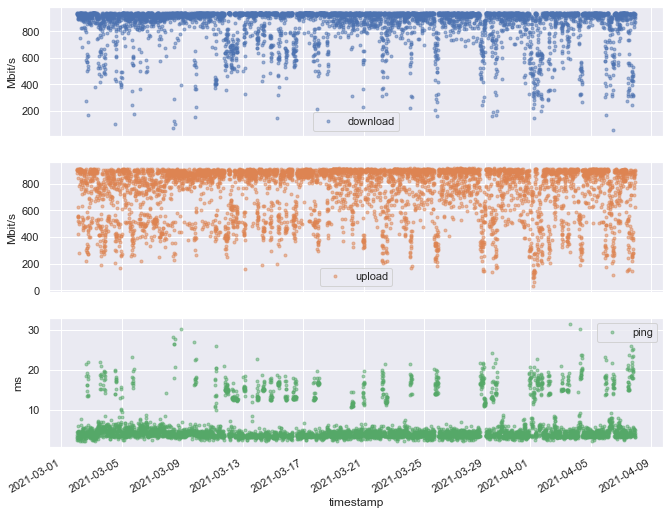

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})

units = {"download": "Mbit/s", "upload":"Mbit/s", "ping":"ms"}
cols_plot = ["download", "upload", "ping"]
axes = df[cols_plot].plot(marker=".", alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for index, ax in enumerate(axes):
    ax.set_ylabel(units[cols_plot[index]])

### Hourly mean resample and daily rolling mean

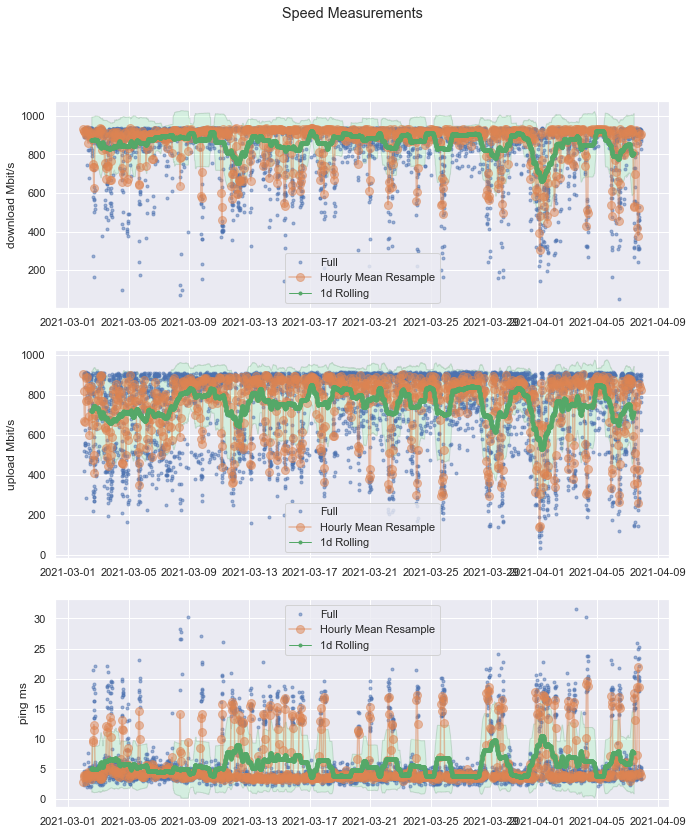

In [5]:
df_hourly_mean = df[cols_plot].resample("h").mean()
df_rolling = df[cols_plot].resample("10min").mean()
df_rolling = df.dropna(subset=['download']).rolling(144, center=True).mean()
df_rolling_std = df.dropna(subset=['download']).rolling(144, center=True).std()


fig, axes = plt.subplots(len(cols_plot), figsize=(11, 13))

fig.suptitle('Speed Measurements')
for index, ax in enumerate(axes):
    target = cols_plot[index]
    ax.plot(df.loc[:,target],alpha=0.5,marker='.', linestyle='None', linewidth=0.5, label='Full')
    ax.plot(df_hourly_mean.loc[:, target],
    alpha=0.5, marker='o', markersize=8, linestyle='-', label='Hourly Mean Resample')
    ax.plot(df_rolling.loc[:,target],marker='.', linestyle='-', linewidth=1, label='1d Rolling')
    ax.fill_between(df_rolling.index, df_rolling.loc[:,cols_plot[index]]-df_rolling_std.loc[:,cols_plot[index]], df_rolling.loc[:,cols_plot[index]]+df_rolling_std.loc[:,cols_plot[index]],
        alpha=0.2, edgecolor='#3F7F4C', facecolor='#7EFF99')
    
    ax.set_ylabel(target + " " + units[target])
    ax.legend()

### Statistics on speed per day

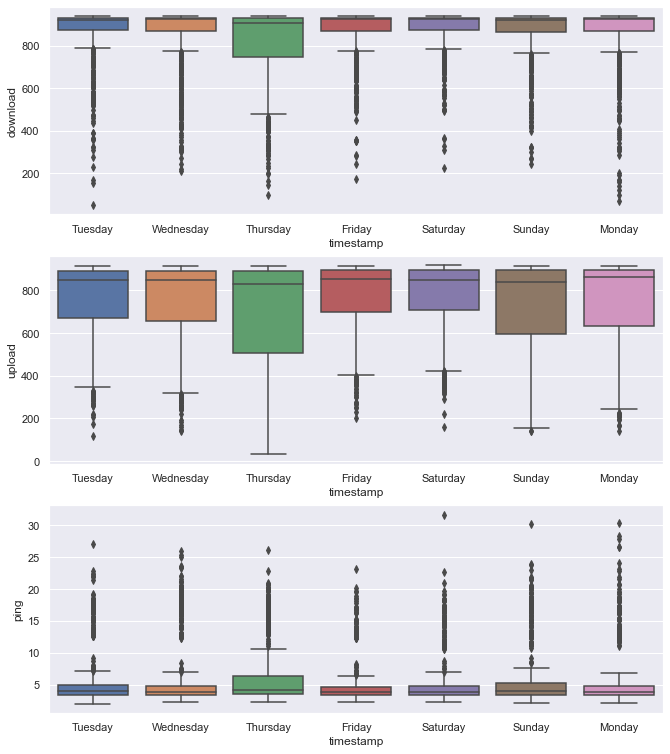

In [6]:
fig, axes = plt.subplots(len(cols_plot), figsize=(11, 13))


for index, ax in enumerate(axes):
    sns.boxplot(ax=ax, data=df, x=df.index.day_name(), y=cols_plot[index])


### Statistics on speed throughout day

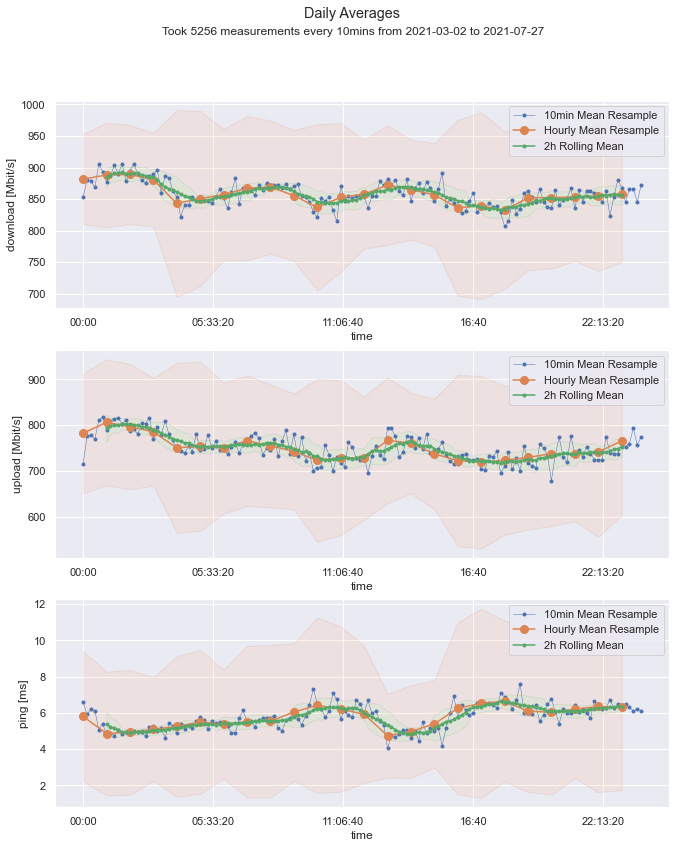

In [7]:
# troughout day

#df_daily = df[cols_plot].groupby(df.index.time).mean()
df_10minutely_mean_full = df[cols_plot].resample("10min").mean()
df_10minutely_mean = df_10minutely_mean_full.groupby(df_10minutely_mean_full.index.time).mean()
df_10minutely_std = df_10minutely_mean_full.groupby(df_10minutely_mean_full.index.time).std()

df_daily_hourly_mean = df_hourly_mean.groupby(df_hourly_mean.index.time).mean()
df_daily_hourly_std = df_hourly_mean.groupby(df_hourly_mean.index.time).std()


df_daily_2h = df_10minutely_mean[cols_plot].rolling(12, center=True).mean()
df_daily_2h_std = df_10minutely_mean[cols_plot].rolling(12, center=True).std()


pd.plotting.register_matplotlib_converters()
fig, axes = plt.subplots(len(cols_plot), figsize=(11, 13))
fig.text(0.26, 0.95, f"Took {df.shape[0]} measurements every 10mins from {df.index.min().date()} to {df.index.max().date()}", fontsize=12)
fig.suptitle('Daily Averages')
for index, ax in enumerate(axes):
    ax.plot(df_10minutely_mean.loc[:,cols_plot[index]],marker='.', linestyle='-', linewidth=0.5, label='10min Mean Resample')
    
    ax.plot(df_daily_hourly_mean.loc[:, cols_plot[index]],marker='o', markersize=8, linestyle='-', label='Hourly Mean Resample')
    ax.fill_between(df_daily_hourly_mean.index, df_daily_hourly_mean.loc[:,cols_plot[index]]-df_daily_hourly_std.loc[:,cols_plot[index]], df_daily_hourly_mean.loc[:,cols_plot[index]]+df_daily_hourly_std.loc[:,cols_plot[index]],
        alpha=0.1, edgecolor='#CC4F1B', facecolor='#FF9848')
        
    ax.plot(df_daily_2h.loc[:, cols_plot[index]],marker='.', linestyle='-', label='2h Rolling Mean')
    ax.fill_between(df_daily_2h.index, df_daily_2h.loc[:,cols_plot[index]]-df_daily_2h_std.loc[:,cols_plot[index]], df_daily_2h.loc[:,cols_plot[index]]+df_daily_2h_std.loc[:,cols_plot[index]],
        alpha=0.1, edgecolor='#3F7F4C', facecolor='#7EFF99')
    
    ax.set_ylabel(cols_plot[index] + " [" + units[cols_plot[index]] + "]")
    df_10minutely_mean.loc[:,cols_plot[index]]
    ax.legend()


## Statistics on weekdays

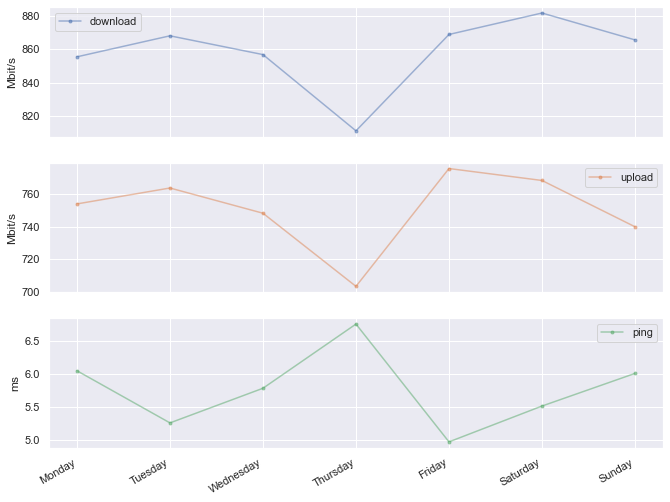

In [8]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

df_weekday = df.copy()
df_weekday = df_weekday.groupby(df_weekday.index.dayofweek).mean()
#df_weekday.reindex(days)
#print(df_weekday)
df_weekday.index = days
axes = df_weekday[cols_plot].plot(marker=".", alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for index, ax in enumerate(axes):
    ax.set_ylabel(units[cols_plot[index]])
